# 합성곱신경망 다중분류 (fashion-mnist - 흑백이미지)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras

## 1. 데이터 준비

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

## 2. 데이터 정보

In [ ]:
classes = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
samples = np.random.randint(60000, size=25)
samples

array([24051, 32618, 23650, 58531, 56406, 41292, 26587, 12852, 22618,
       34536, 24051, 38119, 22509, 53994, 19297, 41294, 50804, 17503,
       37688, 35420, 24142, 14703,  3665, 35018, 16247])

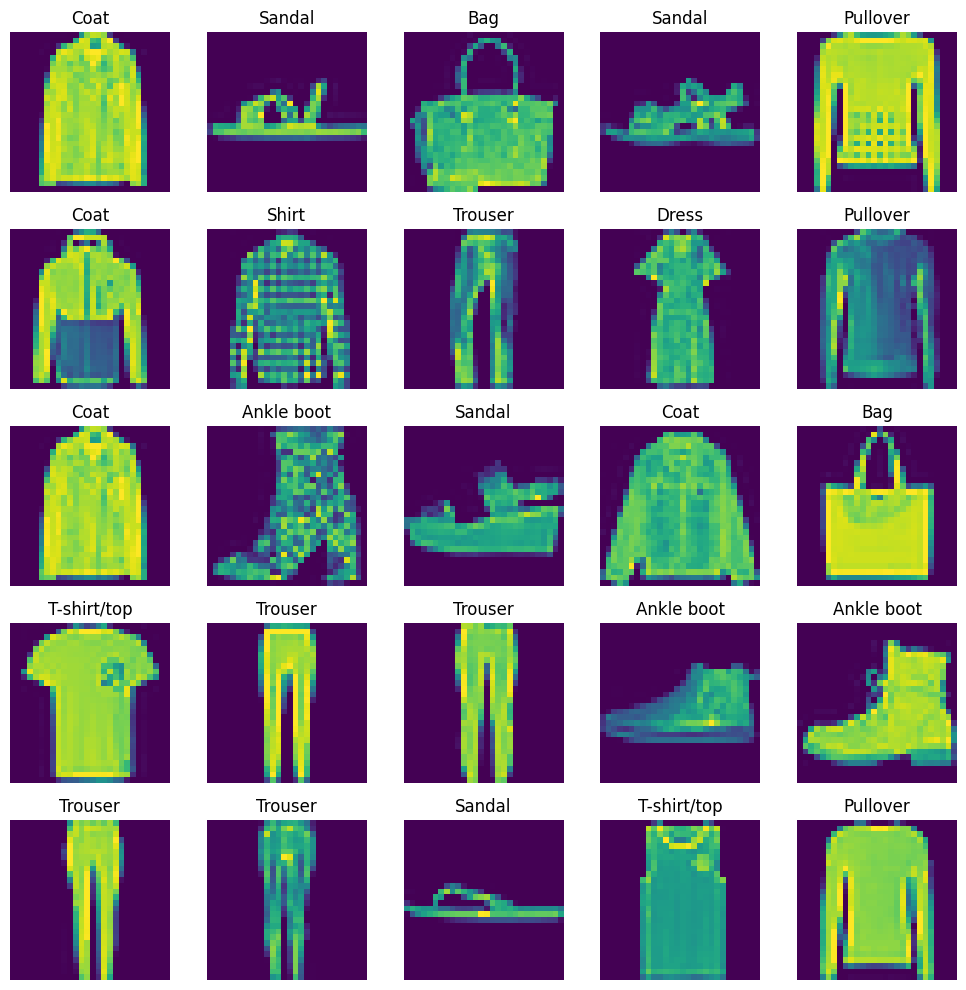

In [ ]:
fig = plt.figure(figsize=(10, 10))

for i, idx in enumerate(samples):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[idx])
  plt.axis('off')
  plt.title(classes[y_train[idx]])
plt.tight_layout()
plt.show()

## 3. 데이터 분리

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((48000, 28, 28), (12000, 28, 28), (48000,), (12000,))

### 스케일링

In [ ]:
x_train_s = x_train.astype('float32') / 255
x_val_s = x_val.astype('float32') / 255
x_val.shape

(12000, 28, 28)

### 원핫인코딩

In [ ]:
from keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_val_o = to_categorical(y_val)

## 4. 모델 만들기

In [ ]:
x_train_s = x_train_s.reshape(-1, 28, 28, 1) # 흑백이라 1
x_train_s.shape

(48000, 28, 28, 1)

In [ ]:
x_val_s = x_val_s.reshape(-1, 28, 28, 1)
x_val_s.shape

(12000, 28, 28, 1)

In [ ]:
from keras import layers
import tensorflow as tf

model = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu'), # 컨볼루션 레이어에는 3차원으로 입력해야 함 -> 마지막 RGB때문에
    keras.layers.MaxPool2D(pool_size=(2,2)), # 맥스 풀링 레이어
    keras.layers.Conv2D(filters = 64, kernel_size = 3, activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(), # 2차원 -> 1차원
    keras.layers.Dense(units = 128, activation='relu'), # Fully connected layer
    keras.layers.Dense(units = 10, activation='softmax') # 출력층 (분류 클래스 개수 10)
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 243,786 (952.29 KB)

 Trainable params: 243,786 (952.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer= 'adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'] # 분류 -> accuracy
    )

In [ ]:
EPOCHS = 30
BATCHSIZE = 64

history = model.fit(x_train_s, y_train_o, epochs=EPOCHS, batch_size=BATCHSIZE, validation_data=(x_val_s, y_val_o))

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7434 - loss: 0.7135 - val_accuracy: 0.8700 - val_loss: 0.3545
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8770 - loss: 0.3365 - val_accuracy: 0.8827 - val_loss: 0.3241
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8925 - loss: 0.2917 - val_accuracy: 0.8949 - val_loss: 0.2842
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9066 - loss: 0.2523 - val_accuracy: 0.8946 - val_loss: 0.2855
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9169 - loss: 0.2272 - val_accuracy: 0.9007 - val_loss: 0.2688
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9231 - loss: 0.2060 - val_accuracy: 0.9086 - val_loss: 0.2544
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9342 - loss: 0.1799 - val_accuracy: 0.9060 - val_loss: 0.2679
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9392 - loss: 0.1646 - val_accuracy: 0.

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.plot(hist['epoch'], hist['loss'], label='train_loss')
    plt.plot(hist['epoch'], hist['val_loss'], label='val_loss')
    plt.title('Loss Curve')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.xlabel('Epoch')
    plt.ylabel('accuracy')
    plt.plot(hist['epoch'], hist['accuracy'], label='train_accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy'], label='val_accuracy')
    plt.title('Accuracy Curve')
    plt.legend()

    plt.show()

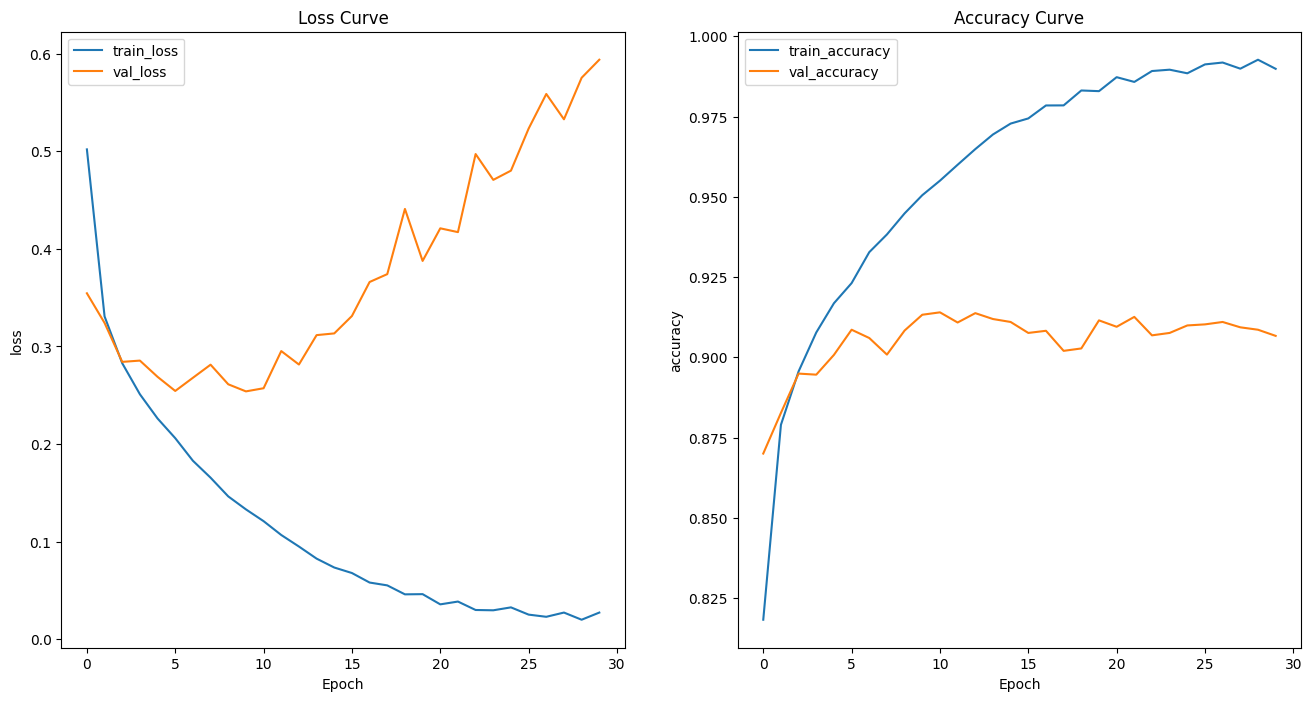

In [ ]:
plot_history(history)

## 5. 테스트

In [ ]:
# 스케일링
x_test_s = x_test.astype('float32')/255
x_test_s = x_test_s.reshape(-1, 28, 28, 1)
x_test_s.shape

(10000, 28, 28, 1)

In [ ]:
y_pred = model.predict(x_test_s)
y_pred = y_pred.argmax(axis=1)
y_pred

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [ ]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

## 6. 평가 지표

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix # import confusion_matrix
import seaborn as sns

def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  prec = precision_score(y_true, y_pred, average='macro')
  recall = recall_score(y_true, y_pred, average='macro')
  f1 = f1_score(y_true, y_pred, average='macro')

  print(f'acc: {acc:.4f}, prec: {prec:.4f}, recall: {recall:.4f}, f1: {f1:.4f}')

  cm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cm, cmap = 'Blues', annot=True, fmt = 'd',cbar=False)
  s.set_xlabel('Predicted')
  s.set_ylabel('Actual')
  plt.show()

acc: 0.9082, prec: 0.9073, recall: 0.9082, f1: 0.9064


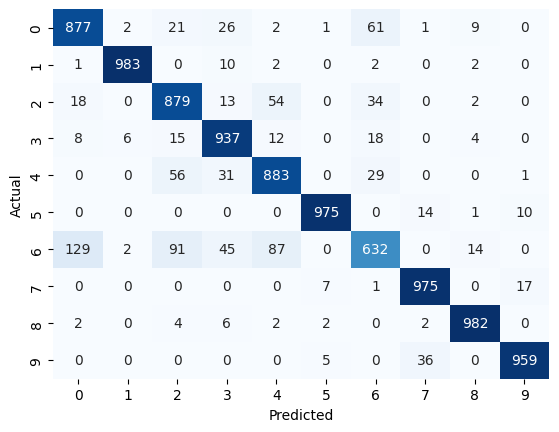

In [ ]:
print_metrics(y_test, y_pred)